In [1]:
allure_etudier=2

In [2]:
import sys
sys.path.insert(0, "C:/projets_python/diabolo")
import warnings
warnings.filterwarnings("ignore")

In [3]:
from math import *

#LIBRAIRIES PERSO
import etude_variable.jouer as jj




# LIBRAIRIE PYHTON CLASSIQUES
import pandas as pd
import numpy as np
import matplotlib
import scipy
import platform
from collections import Counter
#ESTIMATEUR
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier


#TRAINING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import dask_searchcv as dcv
from skopt.space import Real, Integer
from sklearn.model_selection import cross_validate

#Evaluateur
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.utils import class_weight

#outils
from dask.diagnostics import ProgressBar
import logging
from datetime import datetime


#Metriques
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import  metrics
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  classification_report

from sklearn.preprocessing import StandardScaler

#Outils

import time


#Graphique
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0
Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0


In [4]:
index_col = ['IDPARTCIPANT', 'IDCOURSE']
start_time=jj.timer()
# lecture des données brutes contruite par l'application Windev
df2 = jj.lecture_data('d:\data_diabolo.csv', jj.get_names(), xindex_col=index_col, allure=allure_etudier, avec_index=False)
print(df2.shape)

jj.timer(start_time)

2018-07-23 21:27:48.167086
<class 'pandas.core.frame.DataFrame'>
Int64Index: 259646 entries, 100 to 781273
Data columns (total 54 columns):
ALLURE                       259646 non-null int64
CO_DISTANCE                  259646 non-null int64
CO_PRIX                      259646 non-null int64
HIPPO                        259646 non-null int64
IDCOURSE                     259646 non-null int64
IDPARTCIPANT                 259646 non-null int64
PAR_AGE                      259646 non-null int64
PAR_ARRIVE                   259646 non-null int64
PAR_CARRIERE                 259646 non-null int64
PAR_CARRIERE_Q               259646 non-null int64
PAR_CLASSE_AGE               259646 non-null int64
PAR_COTEDER                  259646 non-null int64
PAR_ENT_ECART_GAGNANT        259646 non-null int64
PAR_ENT_RAPPORT_GAGNANT_M    259646 non-null float64
PAR_ENT_REU_PLACE            259646 non-null float64
PAR_ENT_REUSSITE_GAGNE       259646 non-null float64
PAR_ENT_VICTOIRE             259646 no

In [5]:
df2 = df2.groupby("ALLURE")
df2 = df2.get_group(allure_etudier)
df2 = jj.my_drop(df2, 'ALLURE')



In [6]:
df2=jj.transformation(df2, allure_etudier)






----------- TRANSFORMATION --------- AJOUT DE COLONNE------------

(259646, 53)
2018-07-23 21:27:53.429025

 Time taken: 0 hours 0 minutes and 0.65 seconds.
Apres transformation des lignes sont supprimées
(243021, 53)


In [7]:
#df2=jj.conversion(df2)  <<<<<<<<<<<<<<<<< INUTILE POUR LE MOMENT !!!!!!!!!!!!!!!!!!!
#df2 = jj.encodage(df2)

scalerise=0
#print(df2.head(2))

In [8]:





df2['SELECTION2']=df2['SELECTION2'].astype('float')
df2['SELECTION2']=df2['SELECTION2'].astype('int')
df2 = jj.suppression_colonne(df2=df2,allure=0)
df2 = jj.suppression_colonne(df2=df2,allure=allure_etudier)


#df2=df2[ ['SELECTION2','PAR_REUSSITE_3P','p2018','PAR_REUSSITE_GAGNE' ,'IDPARTCIPANT', 'IDCOURSE' ]]


Suppression colonnne  0
Suppression colonnne  2


In [9]:
print(df2.head(5))

     IDCOURSE  IDPARTCIPANT  PAR_CARRIERE  PAR_ENT_ECART_GAGNANT  \
102      1622         19930            22                      0   
103      1622         19929             3                      0   
104      1622         19928             3                      0   
105      1622         19927             2                     10   
106      1622         19926             6                      4   

     PAR_ENT_REU_PLACE  PAR_ENT_REUSSITE_GAGNE  PAR_ENT_VICTOIRE  \
102               0.19                    0.14                 3   
103               0.20                    0.00                 0   
104               0.06                    0.00                 0   
105               0.32                    0.09                 3   
106               0.32                    0.16                 5   

     pAR_JOC_ECART_GAGNANT  PAR_JOC_NB_COURSE  PAR_JOC_PLACE_3P     ...      \
102                      0                 10                 1     ...       
103                     

In [10]:

# Creating bins for the win column
def assign_selection2(W):
    if W==1:
        return 1
    if W==0:
        return 0
    
    


Lib_features_df = df2.columns
xdata = df2.values

df_gagnant = pd.DataFrame(data=xdata, columns=Lib_features_df)


df_gagnant['SELECTION'] = df_gagnant['SELECTION2'].apply(assign_selection2)
df_gagnant.drop(["SELECTION2"], axis=1, inplace=True)

index_col = ['IDPARTCIPANT', 'IDCOURSE']
df_gagnant = df_gagnant.set_index(index_col)
df_gagnant_len = len(df_gagnant.columns) - 1
Lib_features = df_gagnant.columns[:df_gagnant_len]

feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<

print("DEFINITION DE LA STRUCTURE ---------------------------------------------------------")
print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES ",Lib_features)
print("(3) response column ",response_column)
# df_gagnant, feature_columns, response_column, ratio SONT DEFINI


DEFINITION DE LA STRUCTURE ---------------------------------------------------------
(1) Shape df_gagnant   (243021, 20) 

(2) FEATURES  Index(['PAR_CARRIERE', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_REU_PLACE',
       'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'pAR_JOC_ECART_GAGNANT',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'PAR_JOC_REU_PLACE',
       'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_RUESSITE_PLACE', 'Point', 'POIDS', 'CORDE',
       'PAR_ENT_ECART_PLACE', 'PAR_ENT_NB_COURSE'],
      dtype='object')
(3) response column  ['SELECTION']


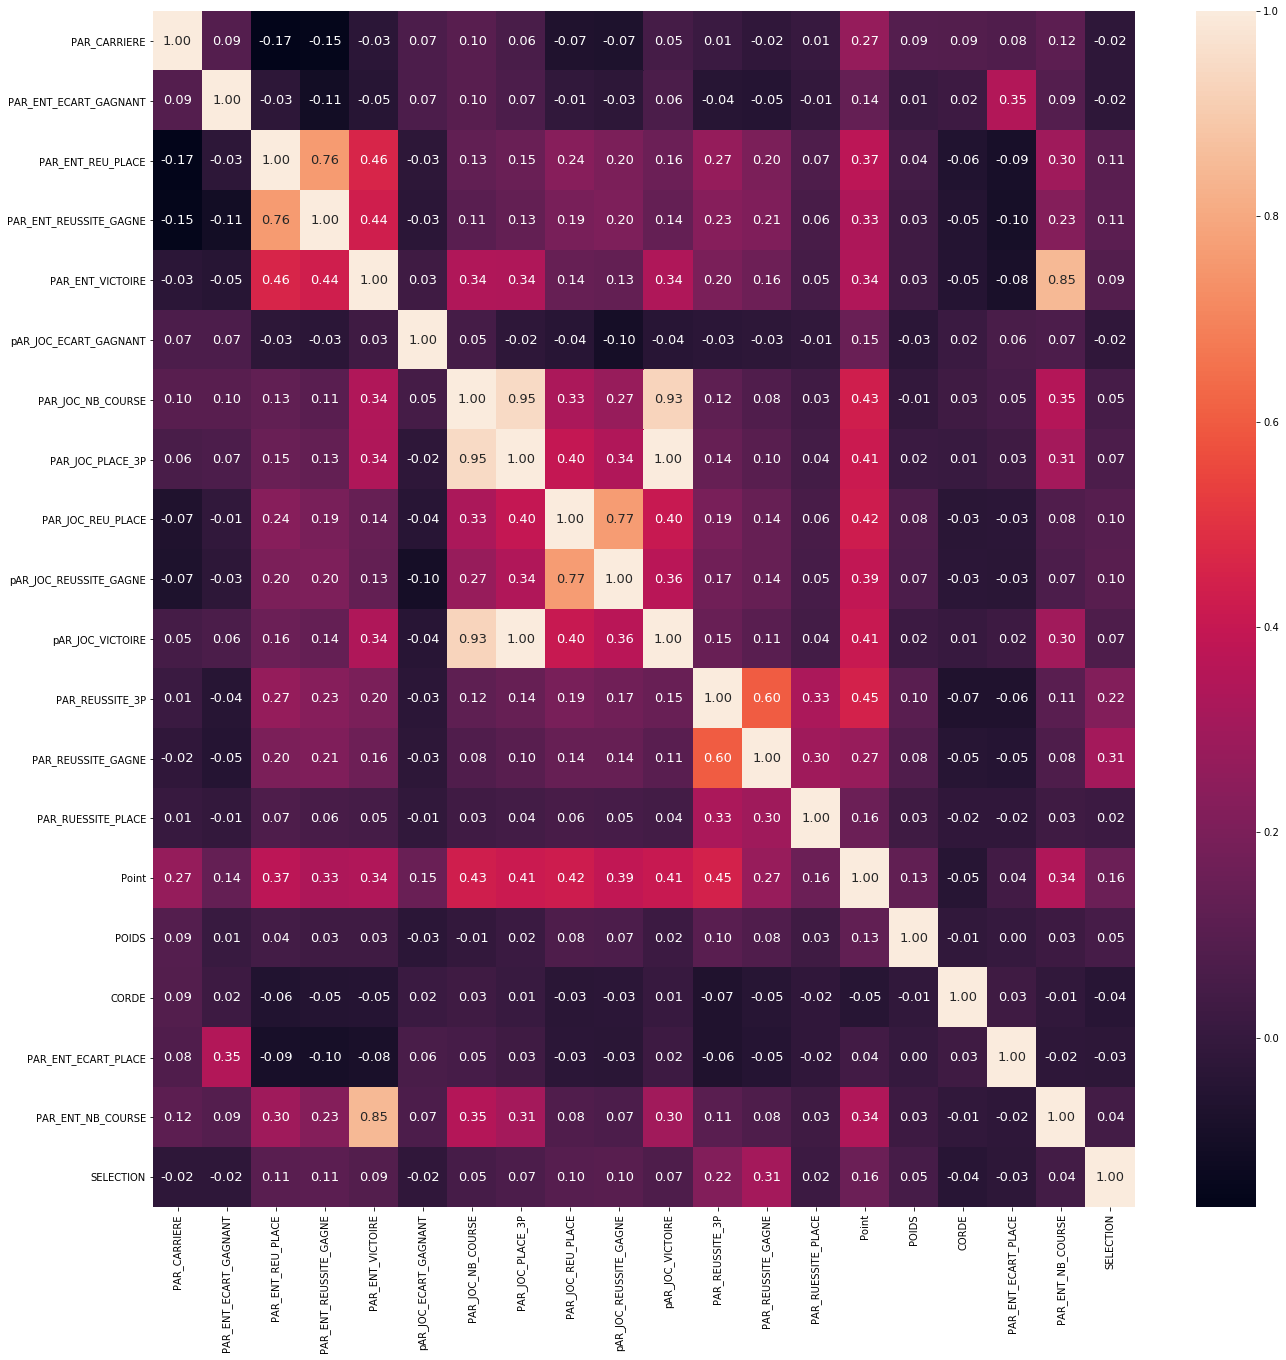

In [11]:

#Enfin, quelque chose de vraiment cool que vous pouvez mettre 
#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.

fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=.0, ax=ax, annot_kws={"size": 13}, xticklabels = 1 )








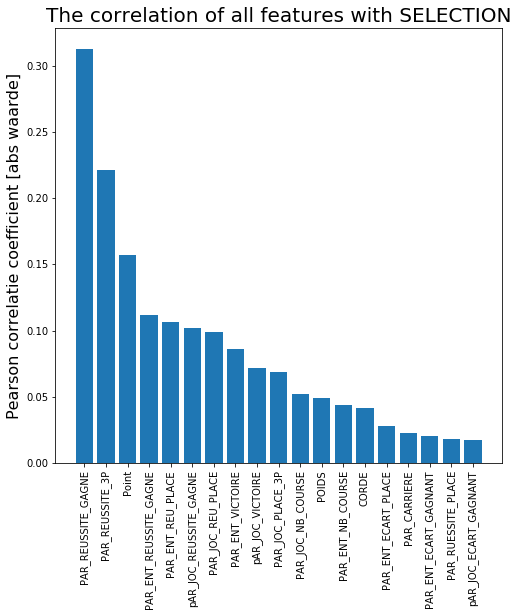

In [12]:
jj.display_corr_with_col(df_gagnant, 'SELECTION')

In [13]:
df_gagnant.describe()

,PAR_CARRIERE,PAR_ENT_ECART_GAGNANT,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,pAR_JOC_ECART_GAGNANT,PAR_JOC_NB_COURSE,PAR_JOC_PLACE_3P,PAR_JOC_REU_PLACE,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_RUESSITE_PLACE,Point,POIDS,CORDE,PAR_ENT_ECART_PLACE,PAR_ENT_NB_COURSE,SELECTION
count,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000,243021.000000
mean,26.206274,7.351023,0.253413,0.081814,17.457331,8.566268,314.127845,98.437575,0.255392,0.082334,33.938524,0.304448,0.104696,0.202307,162.634999,57.002440,6.595702,2.267940,165.247477,0.092009
std,25.501821,10.852996,0.147215,0.071105,25.894757,11.643882,380.243676,145.994096,0.133912,0.063357,53.231467,0.213512,0.133820,0.393240,64.882987,2.660946,3.990973,3.467846,194.122981,0.289039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.170000,0.040000,1.000000,1.000000,33.000000,8.000000,0.190000,0.040000,2.000000,0.166667,0.000000,0.094340,120.000000,56.000000,3.000000,0.000000,22.000000,0.000000
50%,18.000000,3.000000,0.250000,0.070000,7.000000,4.000000,142.000000,36.000000,0.250000,0.080000,12.000000,0.290323,0.080000,0.188679,162.000000,57.000000,6.000000,1.000000,91.000000,0.000000
75%,38.000000,10.000000,0.350000,0.120000,24.000000,12.000000,500.000000,141.000000,0.330000,0.110000,46.000000,0.411765,0.142857,0.274194,203.000000,58.000000,9.000000,3.000000,249.000000,0.000000
max,194.000000,103.000000,1.000000,1.000000,193.000000,119.000000,1687.000000,835.000000,1.000000,1.000000,314.000000,1.000000,13.000000,60.000000,669.000000,79.000000,24.000000,54.000000,931.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F6343E8D0>,
      dtype=object)

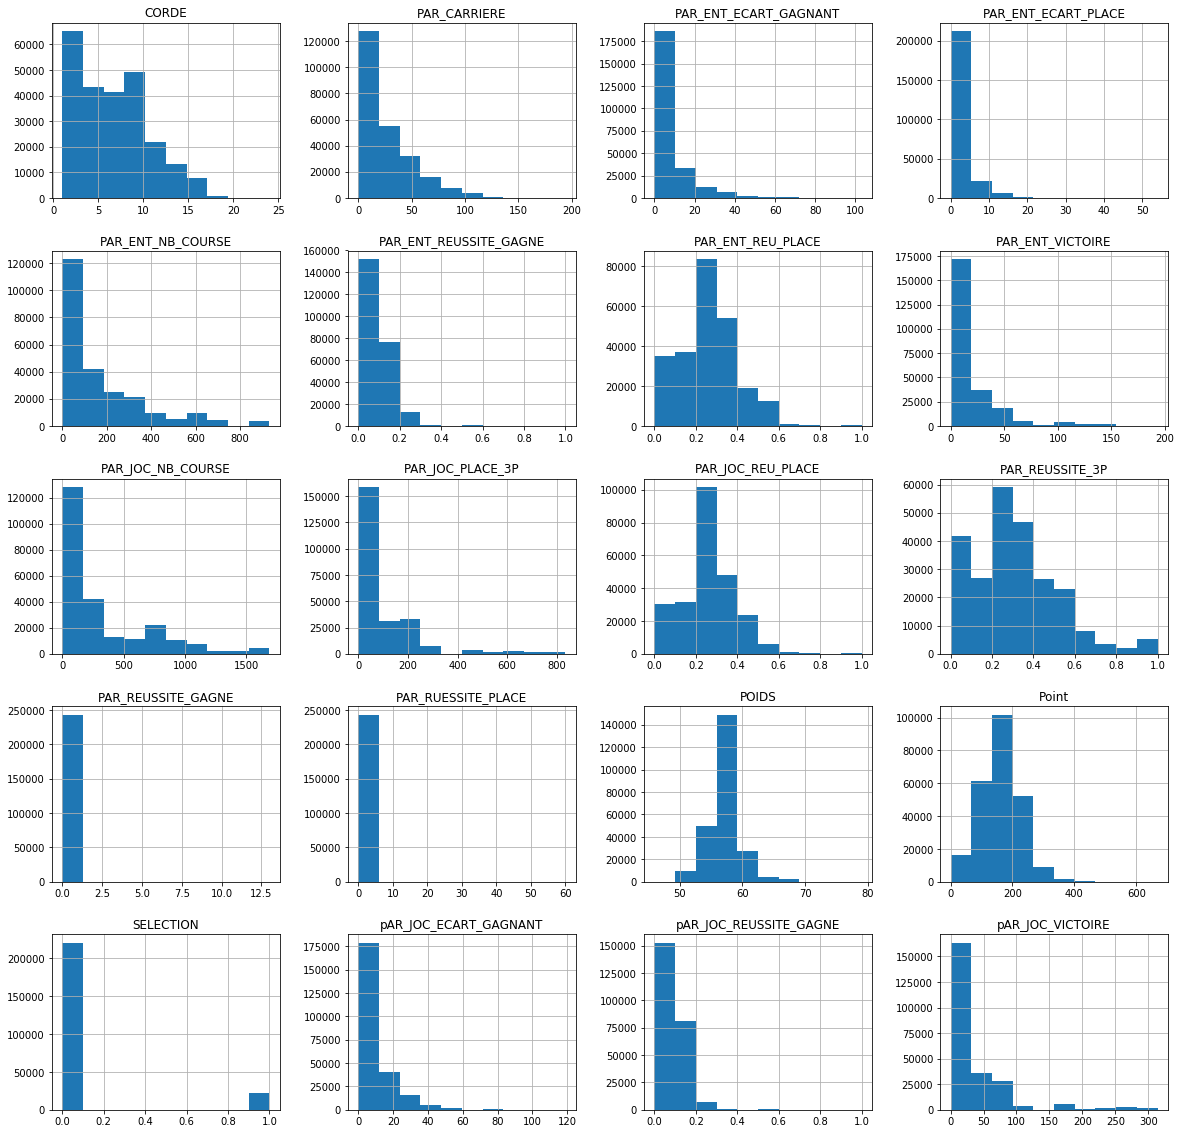

In [14]:
df_gagnant.hist( figsize = (20,20))


Proportion: 9.87 : 1
Total number of records : 243021 
Nombre de participations avec SELECTION = 0 : 220661
Nombre de participations avec SELECTION = 1  : 22360
Pourcentage 0: 90.7991%,  pourcentage 1 : 9.2009%


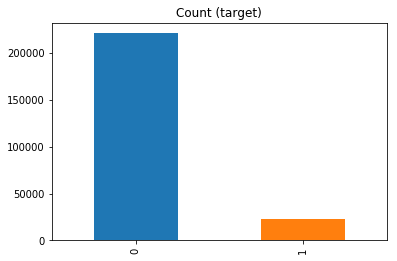

In [15]:

target_count = df_gagnant['SELECTION'].value_counts()

print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)')
normal_trans_perc = sum(df_gagnant['SELECTION'] == 0) / (sum(df_gagnant['SELECTION'] == 0) + sum(df_gagnant['SELECTION'] == 1))
fraud_trans_perc = 1 - normal_trans_perc
print('Total number of records : {} '.format(len(df_gagnant)))
print('Nombre de participations avec SELECTION = 0 : {}'.format(sum(df_gagnant['SELECTION'] == 0)))
print('Nombre de participations avec SELECTION = 1  : {}'.format(sum(df_gagnant['SELECTION'] == 1)))
print('Pourcentage 0: {:.4f}%,  pourcentage 1 : {:.4f}%'.format(normal_trans_perc * 100,fraud_trans_perc * 100))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F626BDFD0>,
      dtype=object)

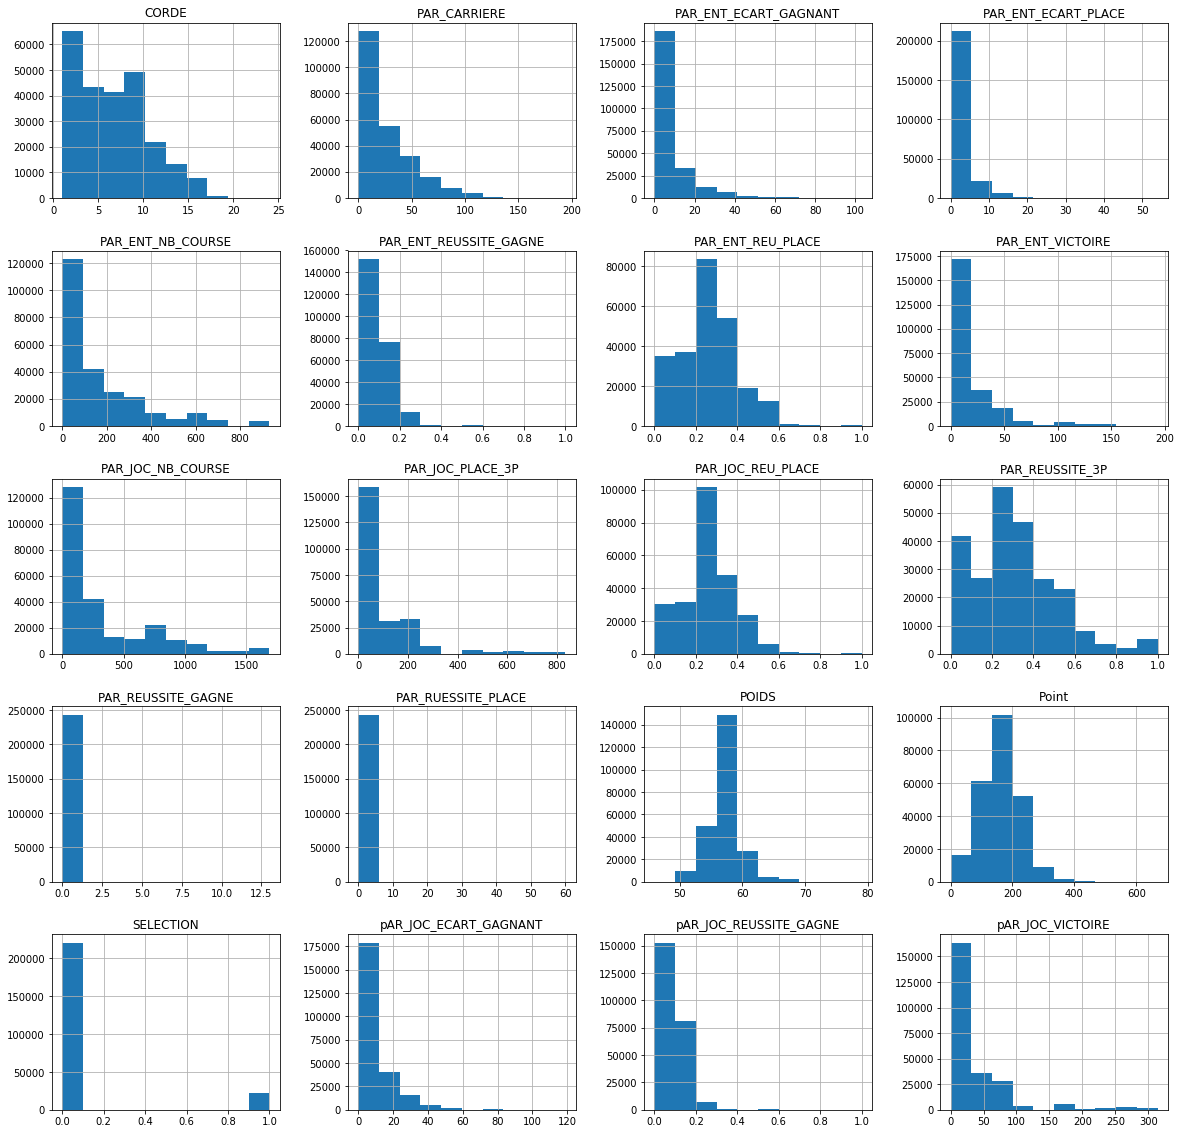

In [16]:
df_gagnant.hist( figsize = (20,20))

In [17]:
#scaler = MinMaxScaler( feature_range=(0, 400))
#MaxAbsScaler
#scaled_features = df_gagnant.copy()
#eatures = scaled_features[jj.get_critere_scale(allure_etudier)]

#scaler = MinMaxScaler(feature_range=(0, 400)).fit(features.values)
#scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))

#features = scaler.fit_transform(features.values)
#scaled_features[jj.get_critere_scale(allure_etudier)] = features

#df_gagnant=scaled_features


#df_gagnant = jj.encodage(df_gagnant,scaler)

In [18]:
df_gagnant.head(5)

,,PAR_CARRIERE,PAR_ENT_ECART_GAGNANT,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,pAR_JOC_ECART_GAGNANT,PAR_JOC_NB_COURSE,PAR_JOC_PLACE_3P,PAR_JOC_REU_PLACE,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_RUESSITE_PLACE,Point,POIDS,CORDE,PAR_ENT_ECART_PLACE,PAR_ENT_NB_COURSE,SELECTION
IDPARTCIPANT,IDCOURSE,,,,,,,,,,,,,,,,,,,,
19930.0,1622.0,22.0,0.0,0.19,0.14,3.0,0.0,10.0,1.0,0.10,0.00,0.0,0.318182,0.090909,0.227273,115.0,50.0,10.0,0.0,21.0,0
19929.0,1622.0,3.0,0.0,0.20,0.00,0.0,6.0,76.0,21.0,0.27,0.06,5.0,0.000000,0.000000,0.000000,62.0,52.0,3.0,3.0,10.0,0
19928.0,1622.0,3.0,0.0,0.06,0.00,0.0,0.0,9.0,1.0,0.11,0.00,0.0,0.000000,0.000000,0.000000,19.0,54.0,7.0,0.0,16.0,0
19927.0,1622.0,2.0,10.0,0.32,0.09,3.0,8.0,26.0,9.0,0.34,0.15,4.0,0.500000,0.500000,0.000000,149.0,55.0,9.0,0.0,31.0,1
19926.0,1622.0,6.0,4.0,0.32,0.16,5.0,1.0,30.0,12.0,0.40,0.16,5.0,0.500000,0.000000,0.500000,171.0,56.0,2.0,0.0,31.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F0072A978>,
      dtype=object)

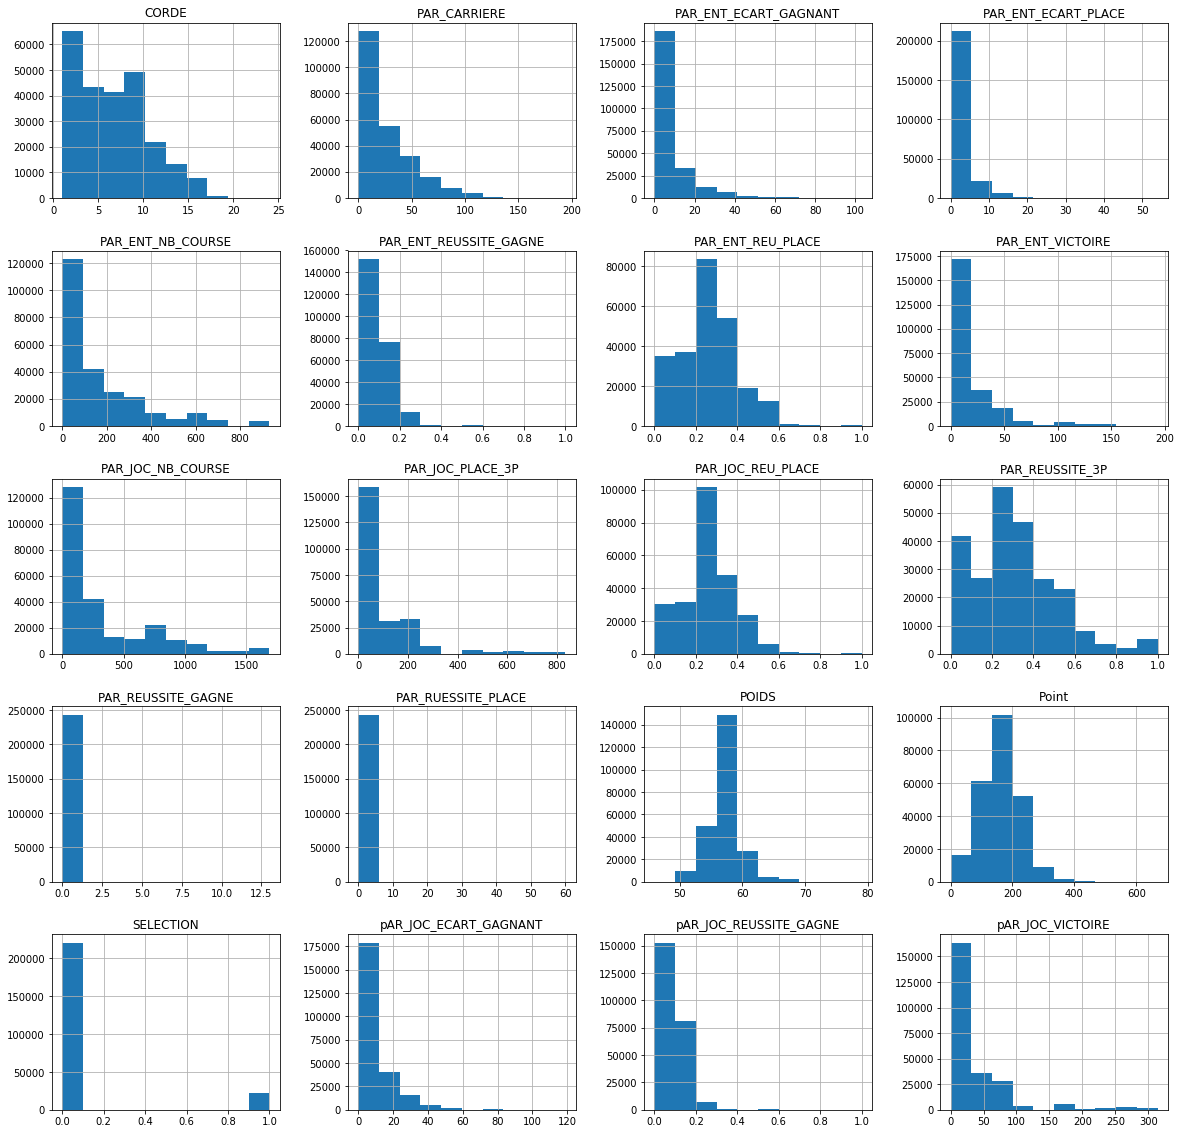

In [19]:
df_gagnant.hist( figsize = (20,20))

In [20]:

#train_x, test_x, train_y, test_y = jj.split_data2(df_gagnant, feature_columns,response_column)
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_gagnant[feature_columns],df_gagnant[response_column], test_size=0.30, random_state=42)

train_eval_X = df_gagnant[feature_columns]
train_eval_Y = df_gagnant[response_column]
print("SPLIT des données ....\n")

print("Train_x", train_x.shape)
print("Train y", train_y.shape)
print("")
print("Test x", test_x.shape)
print("Test y", test_y.shape)

#print("train_eval_X", train_eval_X.shape)
#print("train_eval_Y", train_eval_Y.shape)

#test_y = test_y['SELECTION'].ravel()
#train_y = train_y['SELECTION'].ravel()

#train_x, train_y = jj.smot2(train_x=train_x, train_y=train_y, feature_columns=feature_columns)

print("apres SMOT2")
print("Train_x", train_x.shape)
print("Train y", train_y.shape)
#test_x, test_y = smot2(train_x=test_x, train_y=test_y, feature_columns=feature_columns)


SPLIT des données ....

Train_x (170114, 19)
Train y (170114, 1)

Test x (72907, 19)
Test y (72907, 1)
apres SMOT2
Train_x (170114, 19)
Train y (170114, 1)


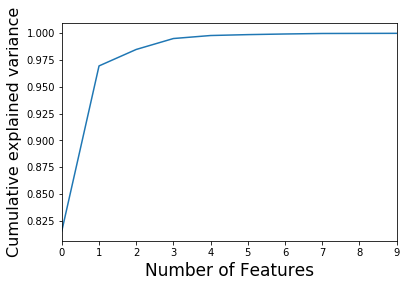

In [21]:
from sklearn.decomposition import PCA 

pca = PCA().fit(train_x)
var_ratio = pca.explained_variance_ratio_
components = pca.components_
#print(pca.explained_variance_)
plt.plot(np.cumsum(var_ratio))
plt.xlim(0,9,1)
plt.xlabel('Number of Features', fontsize=17)
plt.ylabel('Cumulative explained variance', fontsize=16)
plt.show()

In [36]:

model=jj.get_estimator (allure_etudier) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.03,
       max_delta_step=3, max_depth=6, max_features='sqrt',
       min_child_weight=7, missing=None, n_estimators=1600, n_jobs=2,
       nthread=None, objective='binary:logistic', random_state=10,
       reg_alpha=1e-05, reg_lambda=3, scale_pos_weight=6, seed=1300,
       silent=False, subsample=1)


In [ ]:
if (allure_etudier==2):
#    tuned_parameters = {    
  #                      "max_depth": range(5, 7,1),        
    #                    "min_child_weight":range(8,10,1)                       }
    #jj.cross_search(model,tuned_parameters, train_x,train_y, test_x, test_y,allure_etudier)
    
    tuned_parameters = {                                         
                       'n_estimators':range(1400, 1700, 100),
                       'max_depth': range(5, 7,1),   
                       'min_child_weight':range(7,9,1) ,
                       'max_delta_step':range(3, 6, 1),       
                       'seed':range(1200, 1400, 100),
                       'learning_rate':[i/100.0 for i in range(1,4)] 
        
                        }    
    
    jj.cross_search(model,tuned_parameters, train_x,train_y, test_x, test_y,allure_etudier)
    
    #tuned_parameters = {                                         
      #     'seed':range(100, 1500, 200),
        #   'max_delta_step':range(7, 9, 1),                                 
          #              }    
    
    #jj.cross_search(model,tuned_parameters, train_x,train_y, test_x, test_y,allure_etudier)





# Tuning hyper-parameters for precision

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  5.3min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  5.3min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  5.4min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:  7.1min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:  7.2min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  7.2min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  9.0min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  9.1min
[Parallel(n_jobs=3)]: Done  15 tasks     

[Parallel(n_jobs=3)]: Done 134 tasks      | elapsed: 93.1min
[Parallel(n_jobs=3)]: Done 135 tasks      | elapsed: 93.4min
[Parallel(n_jobs=3)]: Done 136 tasks      | elapsed: 93.9min
[Parallel(n_jobs=3)]: Done 137 tasks      | elapsed: 94.9min
[Parallel(n_jobs=3)]: Done 138 tasks      | elapsed: 95.3min
[Parallel(n_jobs=3)]: Done 139 tasks      | elapsed: 95.7min
[Parallel(n_jobs=3)]: Done 140 tasks      | elapsed: 96.8min
[Parallel(n_jobs=3)]: Done 141 tasks      | elapsed: 97.3min
[Parallel(n_jobs=3)]: Done 142 tasks      | elapsed: 97.7min
[Parallel(n_jobs=3)]: Done 143 tasks      | elapsed: 98.8min
[Parallel(n_jobs=3)]: Done 144 tasks      | elapsed: 99.3min
[Parallel(n_jobs=3)]: Done 145 tasks      | elapsed: 99.7min
[Parallel(n_jobs=3)]: Done 146 tasks      | elapsed: 100.8min
[Parallel(n_jobs=3)]: Done 147 tasks      | elapsed: 101.3min
[Parallel(n_jobs=3)]: Done 148 tasks      | elapsed: 101.7min
[Parallel(n_jobs=3)]: Done 149 tasks      | elapsed: 102.8min
[Parallel(n_jobs=3)]

[Parallel(n_jobs=3)]: Done 267 tasks      | elapsed: 185.9min
[Parallel(n_jobs=3)]: Done 268 tasks      | elapsed: 186.5min
[Parallel(n_jobs=3)]: Done 269 tasks      | elapsed: 187.5min
[Parallel(n_jobs=3)]: Done 270 tasks      | elapsed: 187.9min
[Parallel(n_jobs=3)]: Done 271 tasks      | elapsed: 188.3min
[Parallel(n_jobs=3)]: Done 272 tasks      | elapsed: 189.3min
[Parallel(n_jobs=3)]: Done 273 tasks      | elapsed: 189.7min
[Parallel(n_jobs=3)]: Done 274 tasks      | elapsed: 190.0min
[Parallel(n_jobs=3)]: Done 275 tasks      | elapsed: 191.0min
[Parallel(n_jobs=3)]: Done 276 tasks      | elapsed: 191.4min
[Parallel(n_jobs=3)]: Done 277 tasks      | elapsed: 191.9min
[Parallel(n_jobs=3)]: Done 278 tasks      | elapsed: 192.7min
[Parallel(n_jobs=3)]: Done 279 tasks      | elapsed: 193.2min
[Parallel(n_jobs=3)]: Done 280 tasks      | elapsed: 193.6min
[Parallel(n_jobs=3)]: Done 281 tasks      | elapsed: 194.6min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed: 195.1min
[Paralle

[Parallel(n_jobs=3)]: Done 400 tasks      | elapsed: 276.2min
[Parallel(n_jobs=3)]: Done 401 tasks      | elapsed: 277.3min
[Parallel(n_jobs=3)]: Done 402 tasks      | elapsed: 277.7min
[Parallel(n_jobs=3)]: Done 403 tasks      | elapsed: 278.0min
[Parallel(n_jobs=3)]: Done 404 tasks      | elapsed: 279.1min
[Parallel(n_jobs=3)]: Done 405 tasks      | elapsed: 279.6min
[Parallel(n_jobs=3)]: Done 406 tasks      | elapsed: 279.9min
[Parallel(n_jobs=3)]: Done 407 tasks      | elapsed: 280.9min
[Parallel(n_jobs=3)]: Done 408 tasks      | elapsed: 281.4min
[Parallel(n_jobs=3)]: Done 409 tasks      | elapsed: 281.7min
[Parallel(n_jobs=3)]: Done 410 tasks      | elapsed: 282.7min
[Parallel(n_jobs=3)]: Done 411 tasks      | elapsed: 283.3min
[Parallel(n_jobs=3)]: Done 412 tasks      | elapsed: 283.7min
[Parallel(n_jobs=3)]: Done 413 tasks      | elapsed: 284.7min
[Parallel(n_jobs=3)]: Done 414 tasks      | elapsed: 285.3min
[Parallel(n_jobs=3)]: Done 415 tasks      | elapsed: 285.7min
[Paralle

[Parallel(n_jobs=3)]: Done 533 tasks      | elapsed: 366.0min
[Parallel(n_jobs=3)]: Done 534 tasks      | elapsed: 366.6min
[Parallel(n_jobs=3)]: Done 535 tasks      | elapsed: 366.8min
[Parallel(n_jobs=3)]: Done 536 tasks      | elapsed: 367.9min
[Parallel(n_jobs=3)]: Done 537 tasks      | elapsed: 368.6min
[Parallel(n_jobs=3)]: Done 538 tasks      | elapsed: 368.7min
[Parallel(n_jobs=3)]: Done 539 tasks      | elapsed: 369.8min
[Parallel(n_jobs=3)]: Done 540 tasks      | elapsed: 370.5min
[Parallel(n_jobs=3)]: Done 541 tasks      | elapsed: 370.8min
[Parallel(n_jobs=3)]: Done 542 tasks      | elapsed: 371.9min
[Parallel(n_jobs=3)]: Done 543 tasks      | elapsed: 372.6min
[Parallel(n_jobs=3)]: Done 544 tasks      | elapsed: 372.8min
[Parallel(n_jobs=3)]: Done 545 tasks      | elapsed: 374.0min
[Parallel(n_jobs=3)]: Done 546 tasks      | elapsed: 374.7min
[Parallel(n_jobs=3)]: Done 547 tasks      | elapsed: 374.9min
[Parallel(n_jobs=3)]: Done 548 tasks      | elapsed: 376.1min
[Paralle

[Parallel(n_jobs=3)]: Done 666 tasks      | elapsed: 456.0min
[Parallel(n_jobs=3)]: Done 667 tasks      | elapsed: 456.3min
[Parallel(n_jobs=3)]: Done 668 tasks      | elapsed: 457.3min
[Parallel(n_jobs=3)]: Done 669 tasks      | elapsed: 458.1min
[Parallel(n_jobs=3)]: Done 670 tasks      | elapsed: 458.4min
[Parallel(n_jobs=3)]: Done 671 tasks      | elapsed: 459.5min
[Parallel(n_jobs=3)]: Done 672 tasks      | elapsed: 460.3min
[Parallel(n_jobs=3)]: Done 673 tasks      | elapsed: 460.6min
[Parallel(n_jobs=3)]: Done 674 tasks      | elapsed: 461.7min
[Parallel(n_jobs=3)]: Done 675 tasks      | elapsed: 462.5min
[Parallel(n_jobs=3)]: Done 676 tasks      | elapsed: 462.8min
[Parallel(n_jobs=3)]: Done 677 tasks      | elapsed: 463.9min
[Parallel(n_jobs=3)]: Done 678 tasks      | elapsed: 464.8min
[Parallel(n_jobs=3)]: Done 679 tasks      | elapsed: 465.1min
[Parallel(n_jobs=3)]: Done 680 tasks      | elapsed: 466.2min
[Parallel(n_jobs=3)]: Done 681 tasks      | elapsed: 467.1min
[Paralle

[Parallel(n_jobs=3)]: Done 799 tasks      | elapsed: 545.9min
[Parallel(n_jobs=3)]: Done 800 tasks      | elapsed: 546.9min
[Parallel(n_jobs=3)]: Done 801 tasks      | elapsed: 547.6min
[Parallel(n_jobs=3)]: Done 802 tasks      | elapsed: 548.2min
[Parallel(n_jobs=3)]: Done 803 tasks      | elapsed: 549.2min
[Parallel(n_jobs=3)]: Done 804 tasks      | elapsed: 550.0min
[Parallel(n_jobs=3)]: Done 805 tasks      | elapsed: 550.6min
[Parallel(n_jobs=3)]: Done 806 tasks      | elapsed: 551.6min
[Parallel(n_jobs=3)]: Done 807 tasks      | elapsed: 552.3min
[Parallel(n_jobs=3)]: Done 808 tasks      | elapsed: 552.9min
[Parallel(n_jobs=3)]: Done 809 tasks      | elapsed: 553.9min
[Parallel(n_jobs=3)]: Done 810 tasks      | elapsed: 554.6min
[Parallel(n_jobs=3)]: Done 811 tasks      | elapsed: 555.0min
[Parallel(n_jobs=3)]: Done 812 tasks      | elapsed: 555.9min
[Parallel(n_jobs=3)]: Done 813 tasks      | elapsed: 556.7min
[Parallel(n_jobs=3)]: Done 814 tasks      | elapsed: 557.0min
[Paralle

[Parallel(n_jobs=3)]: Done 932 tasks      | elapsed: 636.4min
[Parallel(n_jobs=3)]: Done 933 tasks      | elapsed: 637.0min
[Parallel(n_jobs=3)]: Done 934 tasks      | elapsed: 637.1min
[Parallel(n_jobs=3)]: Done 935 tasks      | elapsed: 638.4min
[Parallel(n_jobs=3)]: Done 936 tasks      | elapsed: 639.1min
[Parallel(n_jobs=3)]: Done 937 tasks      | elapsed: 639.1min
[Parallel(n_jobs=3)]: Done 938 tasks      | elapsed: 640.5min
[Parallel(n_jobs=3)]: Done 939 tasks      | elapsed: 641.1min
[Parallel(n_jobs=3)]: Done 940 tasks      | elapsed: 641.2min
[Parallel(n_jobs=3)]: Done 941 tasks      | elapsed: 642.7min
[Parallel(n_jobs=3)]: Done 942 tasks      | elapsed: 643.3min
[Parallel(n_jobs=3)]: Done 943 tasks      | elapsed: 643.3min
[Parallel(n_jobs=3)]: Done 944 tasks      | elapsed: 644.9min
[Parallel(n_jobs=3)]: Done 945 tasks      | elapsed: 645.5min
[Parallel(n_jobs=3)]: Done 946 tasks      | elapsed: 645.6min
[Parallel(n_jobs=3)]: Done 947 tasks      | elapsed: 647.1min
[Paralle

[Parallel(n_jobs=3)]: Done 1064 tasks      | elapsed: 725.3min
[Parallel(n_jobs=3)]: Done 1065 tasks      | elapsed: 725.9min
[Parallel(n_jobs=3)]: Done 1066 tasks      | elapsed: 726.4min
[Parallel(n_jobs=3)]: Done 1067 tasks      | elapsed: 727.5min
[Parallel(n_jobs=3)]: Done 1068 tasks      | elapsed: 728.1min
[Parallel(n_jobs=3)]: Done 1069 tasks      | elapsed: 728.6min
[Parallel(n_jobs=3)]: Done 1070 tasks      | elapsed: 729.7min
[Parallel(n_jobs=3)]: Done 1071 tasks      | elapsed: 730.4min
[Parallel(n_jobs=3)]: Done 1072 tasks      | elapsed: 730.9min
[Parallel(n_jobs=3)]: Done 1073 tasks      | elapsed: 732.1min
[Parallel(n_jobs=3)]: Done 1074 tasks      | elapsed: 732.8min
[Parallel(n_jobs=3)]: Done 1075 tasks      | elapsed: 733.2min
[Parallel(n_jobs=3)]: Done 1080 out of 1080 | elapsed: 737.1min finished
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree',

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.95      0.87      0.90     66272
          1       0.27      0.50      0.35      6635

avg / total       0.88      0.83      0.85     72907


>>>>>>>>>>  Accuracy: 83.309%
# Tuning hyper-parameters for recall

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  3.5min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  3.5min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  3.7min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  5.3min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  5.4min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:  7.0min
[Parallel(n_jobs=3)]: Done  11 tasks      

[Parallel(n_jobs=3)]: Done 130 tasks      | elapsed: 89.3min
[Parallel(n_jobs=3)]: Done 131 tasks      | elapsed: 90.2min
[Parallel(n_jobs=3)]: Done 132 tasks      | elapsed: 91.1min
[Parallel(n_jobs=3)]: Done 133 tasks      | elapsed: 91.2min
[Parallel(n_jobs=3)]: Done 134 tasks      | elapsed: 92.0min
[Parallel(n_jobs=3)]: Done 135 tasks      | elapsed: 92.9min
[Parallel(n_jobs=3)]: Done 136 tasks      | elapsed: 93.0min
[Parallel(n_jobs=3)]: Done 137 tasks      | elapsed: 93.9min
[Parallel(n_jobs=3)]: Done 138 tasks      | elapsed: 94.8min
[Parallel(n_jobs=3)]: Done 139 tasks      | elapsed: 94.9min
[Parallel(n_jobs=3)]: Done 140 tasks      | elapsed: 95.8min
[Parallel(n_jobs=3)]: Done 141 tasks      | elapsed: 96.8min
[Parallel(n_jobs=3)]: Done 142 tasks      | elapsed: 96.9min
[Parallel(n_jobs=3)]: Done 143 tasks      | elapsed: 97.8min
[Parallel(n_jobs=3)]: Done 144 tasks      | elapsed: 98.8min
[Parallel(n_jobs=3)]: Done 145 tasks      | elapsed: 98.9min
[Parallel(n_jobs=3)]: Do

[Parallel(n_jobs=3)]: Done 263 tasks      | elapsed: 181.1min
[Parallel(n_jobs=3)]: Done 264 tasks      | elapsed: 181.8min
[Parallel(n_jobs=3)]: Done 265 tasks      | elapsed: 182.3min
[Parallel(n_jobs=3)]: Done 266 tasks      | elapsed: 183.1min
[Parallel(n_jobs=3)]: Done 267 tasks      | elapsed: 183.8min
[Parallel(n_jobs=3)]: Done 268 tasks      | elapsed: 184.3min
[Parallel(n_jobs=3)]: Done 269 tasks      | elapsed: 185.1min
[Parallel(n_jobs=3)]: Done 270 tasks      | elapsed: 185.8min
[Parallel(n_jobs=3)]: Done 271 tasks      | elapsed: 186.0min
[Parallel(n_jobs=3)]: Done 272 tasks      | elapsed: 186.8min
[Parallel(n_jobs=3)]: Done 273 tasks      | elapsed: 187.6min
[Parallel(n_jobs=3)]: Done 274 tasks      | elapsed: 187.8min
[Parallel(n_jobs=3)]: Done 275 tasks      | elapsed: 188.6min
[Parallel(n_jobs=3)]: Done 276 tasks      | elapsed: 189.3min
[Parallel(n_jobs=3)]: Done 277 tasks      | elapsed: 189.5min
[Parallel(n_jobs=3)]: Done 278 tasks      | elapsed: 190.3min
[Paralle

[Parallel(n_jobs=3)]: Done 396 tasks      | elapsed: 272.2min
[Parallel(n_jobs=3)]: Done 397 tasks      | elapsed: 272.5min
[Parallel(n_jobs=3)]: Done 398 tasks      | elapsed: 273.2min
[Parallel(n_jobs=3)]: Done 399 tasks      | elapsed: 274.0min
[Parallel(n_jobs=3)]: Done 400 tasks      | elapsed: 274.2min
[Parallel(n_jobs=3)]: Done 401 tasks      | elapsed: 275.1min
[Parallel(n_jobs=3)]: Done 402 tasks      | elapsed: 275.8min
[Parallel(n_jobs=3)]: Done 403 tasks      | elapsed: 276.0min
[Parallel(n_jobs=3)]: Done 404 tasks      | elapsed: 276.9min
[Parallel(n_jobs=3)]: Done 405 tasks      | elapsed: 277.6min
[Parallel(n_jobs=3)]: Done 406 tasks      | elapsed: 277.8min
[Parallel(n_jobs=3)]: Done 407 tasks      | elapsed: 278.7min
[Parallel(n_jobs=3)]: Done 408 tasks      | elapsed: 279.5min
[Parallel(n_jobs=3)]: Done 409 tasks      | elapsed: 279.7min
[Parallel(n_jobs=3)]: Done 410 tasks      | elapsed: 280.6min
[Parallel(n_jobs=3)]: Done 411 tasks      | elapsed: 281.4min
[Paralle

[Parallel(n_jobs=3)]: Done 529 tasks      | elapsed: 360.5min
[Parallel(n_jobs=3)]: Done 530 tasks      | elapsed: 361.5min
[Parallel(n_jobs=3)]: Done 531 tasks      | elapsed: 362.4min
[Parallel(n_jobs=3)]: Done 532 tasks      | elapsed: 362.5min
[Parallel(n_jobs=3)]: Done 533 tasks      | elapsed: 363.4min
[Parallel(n_jobs=3)]: Done 534 tasks      | elapsed: 364.3min
[Parallel(n_jobs=3)]: Done 535 tasks      | elapsed: 364.4min
[Parallel(n_jobs=3)]: Done 536 tasks      | elapsed: 365.4min
[Parallel(n_jobs=3)]: Done 537 tasks      | elapsed: 366.3min
[Parallel(n_jobs=3)]: Done 538 tasks      | elapsed: 366.4min
[Parallel(n_jobs=3)]: Done 539 tasks      | elapsed: 367.4min
[Parallel(n_jobs=3)]: Done 540 tasks      | elapsed: 368.2min
[Parallel(n_jobs=3)]: Done 541 tasks      | elapsed: 368.5min
[Parallel(n_jobs=3)]: Done 542 tasks      | elapsed: 369.4min
[Parallel(n_jobs=3)]: Done 543 tasks      | elapsed: 370.3min
[Parallel(n_jobs=3)]: Done 544 tasks      | elapsed: 370.6min
[Paralle

[Parallel(n_jobs=3)]: Done 662 tasks      | elapsed: 451.8min
[Parallel(n_jobs=3)]: Done 663 tasks      | elapsed: 452.7min
[Parallel(n_jobs=3)]: Done 664 tasks      | elapsed: 453.1min
[Parallel(n_jobs=3)]: Done 665 tasks      | elapsed: 454.0min
[Parallel(n_jobs=3)]: Done 666 tasks      | elapsed: 454.8min
[Parallel(n_jobs=3)]: Done 667 tasks      | elapsed: 455.2min
[Parallel(n_jobs=3)]: Done 668 tasks      | elapsed: 456.2min
[Parallel(n_jobs=3)]: Done 669 tasks      | elapsed: 457.1min
[Parallel(n_jobs=3)]: Done 670 tasks      | elapsed: 457.5min
[Parallel(n_jobs=3)]: Done 671 tasks      | elapsed: 458.5min
[Parallel(n_jobs=3)]: Done 672 tasks      | elapsed: 459.3min
[Parallel(n_jobs=3)]: Done 673 tasks      | elapsed: 459.8min
[Parallel(n_jobs=3)]: Done 674 tasks      | elapsed: 460.8min
[Parallel(n_jobs=3)]: Done 675 tasks      | elapsed: 461.7min
[Parallel(n_jobs=3)]: Done 676 tasks      | elapsed: 462.1min
[Parallel(n_jobs=3)]: Done 677 tasks      | elapsed: 463.1min
[Paralle

In [ ]:
model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.03,
       max_delta_step=8, max_depth=7, max_features='sqrt',
       min_child_weight=2, n_estimators=1600, n_jobs=2,
       nthread=None, objective='binary:logistic', random_state=10,
       reg_alpha=1e-05, reg_lambda=3, scale_pos_weight=6, seed=1090,
       silent=False, subsample=1)

tuned_parameters = {                                         
           'seed':range(500, 2000, 200),
           'max_delta_step':range(5, 10, 1),                                 
                        }    

jj.cross_search(model,tuned_parameters, train_x,train_y, test_x, test_y,allure_etudier)

In [23]:
jj.importance_features(model, train_x, train_y, test_x, test_y)

    

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


RFC Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=23, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.003, n=22, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.004, n=21, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.004, n=21, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.010, n=19, Accuracy: 91.20%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.010, n=19, Accuracy: 91.20%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.011, n=17, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.013, n=16, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.013, n=16, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.017, n=14, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.017, n=14, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.020, n=12, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.023, n=11, Accuracy: 91.18%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.026, n=10, Accuracy: 91.18%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.027, n=9, Accuracy: 91.19%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.029, n=8, Accuracy: 91.18%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.030, n=7, Accuracy: 91.18%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.036, n=6, Accuracy: 91.18%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.052, n=5, Accuracy: 91.17%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.056, n=4, Accuracy: 91.15%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.135, n=3, Accuracy: 91.15%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.219, n=2, Accuracy: 91.15%
Thresh=0.245, n=1, Accuracy: 90.90%


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
model = jj.load_mymodel(allure_etudier)

model2=model.best_estimator_ 

print(model2 )



Restauration modele ...
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.03,
       max_delta_step=8, max_depth=7, max_features='sqrt',
       min_child_weight=2, missing=nan, n_estimators=1600, n_jobs=2,
       nthread=None, objective='binary:logistic', random_state=10,
       reg_alpha=1e-05, reg_lambda=3, scale_pos_weight=6, seed=1090,
       silent=False, subsample=1)


In [26]:
model=jj.get_estimator(allure_etudier)
model=XGBClassifier()
model=jj.fit_estimator(model,train_x,train_y, test_x,test_y)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.03,
       max_delta_step=3, max_depth=6, max_features='sqrt',
       min_child_weight=7, missing=None, n_estimators=1600, n_jobs=2,
       nthread=None, objective='binary:logistic', random_state=10,
       reg_alpha=1e-05, reg_lambda=3, scale_pos_weight=6, seed=1300,
       silent=False, subsample=1)
recherche par modele
2018-07-23 21:30:11.721512
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
fit
FIN recherche par modele

 Time taken: 0 hours 0 minutes and 14.51 seconds.


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


>>>>>>>>>>  Accuracy: 91.194%
             precision    recall  f1-score   support

          0       0.91      1.00      0.95     66272
          1       0.68      0.06      0.11      6635

avg / total       0.89      0.91      0.88     72907



In [27]:

y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
PROBA = model.predict_proba(test_x)
# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print(">>>>>>>>>>  Accuracy: %.3f%%" % (accuracy * 100.0))
print(classification_report(test_y, predictions))
    

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


>>>>>>>>>>  Accuracy: 91.194%
             precision    recall  f1-score   support

          0       0.91      1.00      0.95     66272
          1       0.68      0.06      0.11      6635

avg / total       0.89      0.91      0.88     72907



In [28]:
from sklearn.metrics import f1_score

print("Roc auc score ")
y_true =test_y
print(roc_auc_score(test_y, y_pred))
print("f1 score")
print(f1_score(y_true, y_pred, average='macro')  )
print(f1_score(y_true, y_pred, average='micro')  )
print(f1_score(y_true, y_pred, average='weighted')  )

print(f1_score(y_true, y_pred, average=None))
print("confusion matrix")
print(confusion_matrix(y_true, y_pred))
print("\nprecision score *******************************")
print(metrics.precision_score(y_true, y_pred))
print("\nrecall score")
print(metrics.recall_score(y_true, y_pred))
print("\nf1 score")
print(metrics.f1_score(y_true, y_pred)  )
print("\nbeta score")
print(metrics.fbeta_score(y_true, y_pred, beta=0.5)  )
print(metrics.fbeta_score(y_true, y_pred, beta=1)  )
print(metrics.fbeta_score(y_true, y_pred, beta=2) )
print("\nprecision recall")
print(metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5)  )





Roc auc score 
0.528950857046587
f1 score
0.5326086490235219
0.9119426118205385
0.8770361020057493
[0.95367564 0.11154166]
confusion matrix
[[66084   188]
 [ 6232   403]]

precision score *******************************
0.6818950930626058

recall score
0.060738507912584776

f1 score
0.11154165513423747

beta score
0.22391376819646625
0.11154165513423747
0.07426928605654048

precision recall
(array([0.91382267, 0.68189509]), array([0.99716321, 0.06073851]), array([0.92935736, 0.22391377]), array([66272,  6635], dtype=int64))


                        importance
feature                           
Point                        0.240
PAR_REUSSITE_GAGNE           0.220
PAR_CARRIERE                 0.145
PAR_JOC_NB_COURSE            0.053
PAR_RUESSITE_PLACE           0.053
PAR_ENT_NB_COURSE            0.039
CORDE                        0.034
PAR_REUSSITE_3P              0.033
POIDS                        0.033
PAR_JOC_REU_PLACE            0.029
pAR_JOC_REUSSITE_GAGNE       0.024
pAR_JOC_ECART_GAGNANT        0.023
PAR_ENT_ECART_GAGNANT        0.013
PAR_ENT_VICTOIRE             0.013
PAR_ENT_REU_PLACE            0.013
PAR_JOC_PLACE_3P             0.010
PAR_ENT_REUSSITE_GAGNE       0.010
PAR_ENT_ECART_PLACE          0.009
pAR_JOC_VICTOIRE             0.006


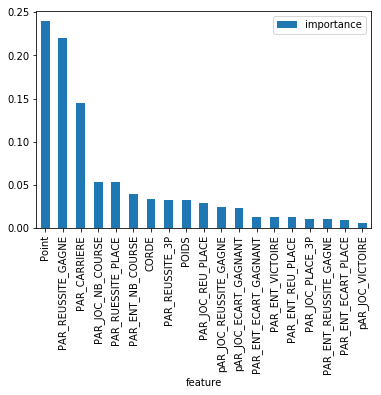

In [29]:
#jj.plot_importance(feature_columns=feature_columns,model=model)

importances = pd.DataFrame({'feature':feature_columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print (importances)
importances.plot.bar()

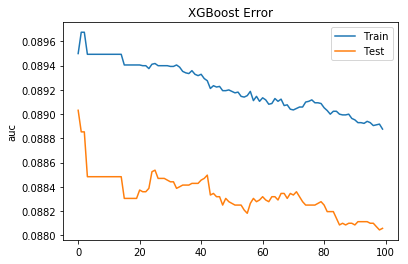

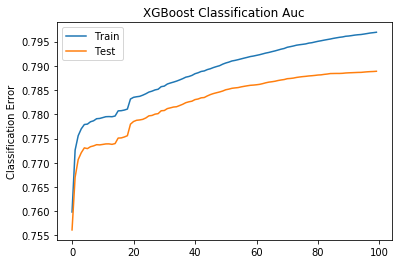

In [30]:

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

 # plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('auc')
pyplot.title('XGBoost Error')
pyplot.show()
        # plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Auc')
pyplot.show()


In [31]:
#jj.affiche_evalSet(model,train_x,train_y,test_x,test_y,1)


#jj.affiche_evalSet(mybest_model=model,set_train=train_x,set_train_cible=train_y,set_test=test_x,set_test_cible=test_y,type_eval=2)




In [32]:

df_numero_a_predire = jj.lecture_data('d:\data_jour.csv', jj.get_names(), ['IDPARTCIPANT', 'IDCOURSE'],allure=allure_etudier,avec_index=False)

print("Fichier lu d:\data_jour.csv" )
df_numero_a_predire = df_numero_a_predire.groupby("ALLURE")
df2_journee = df_numero_a_predire.get_group(allure_etudier)


#calcul des point p2018 pour la journée 

#df2_journee=jj.calcul_les_notes(df=df_numero_a_predire,allure=allure_etudier)

#df2_journee = jj.encodage(df2_journee)

#suppression de quelques colonnnes
df2_journee = jj.suppression_colonne(df2=df2_journee,allure=0)
df2_journee = jj.suppression_colonne(df2=df2_journee,allure=allure_etudier)

df2_journee['SELECTION'] = 0

    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 511
Data columns (total 54 columns):
ALLURE                       132 non-null int64
CO_DISTANCE                  132 non-null int64
CO_PRIX                      132 non-null int64
HIPPO                        132 non-null int64
IDCOURSE                     132 non-null int64
IDPARTCIPANT                 132 non-null int64
PAR_AGE                      132 non-null int64
PAR_ARRIVE                   132 non-null int64
PAR_CARRIERE                 132 non-null int64
PAR_CARRIERE_Q               132 non-null int64
PAR_CLASSE_AGE               132 non-null int64
PAR_COTEDER                  132 non-null int64
PAR_ENT_ECART_GAGNANT        132 non-null int64
PAR_ENT_RAPPORT_GAGNANT_M    132 non-null float64
PAR_ENT_REU_PLACE            132 non-null float64
PAR_ENT_REUSSITE_GAGNE       132 non-null float64
PAR_ENT_VICTOIRE             132 non-null int64
PAR_GAIN                     132 non-null int64
pAR_JOC_ECART_GAGNANT    

In [33]:

df2_journee=df2_journee.set_index( ['IDPARTCIPANT', 'IDCOURSE'])

#df2_journee = jj.encodage(df2_journee,scaler)


#scaled_features = df2_journee.copy()
#features = scaled_features[jj.get_critere_scale(allure_etudier)]
#scaler = MinMaxScaler().fit(features.values)

#features = scaler.transform(features.values)

#scaled_features[jj.get_critere_scale(allure_etudier)] = features

#df2_journee=scaled_features                


In [34]:
train_x, test_x, train_y, test_y = jj.split_dataset(df2_journee, 0, feature_columns, response_column)

    
test_x.head(10)    

,,PAR_CARRIERE,PAR_ENT_ECART_GAGNANT,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,pAR_JOC_ECART_GAGNANT,PAR_JOC_NB_COURSE,PAR_JOC_PLACE_3P,PAR_JOC_REU_PLACE,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_RUESSITE_PLACE,Point,POIDS,CORDE,PAR_ENT_ECART_PLACE,PAR_ENT_NB_COURSE
IDPARTCIPANT,IDCOURSE,,,,,,,,,,,,,,,,,,,
1233548,99538,9,8,0.36,0.09,19,4,539,211,0.39,0.12,65,0.555556,0.111111,0.444444,253,55,3,0,195
1233181,99508,37,14,0.21,0.03,1,2,867,235,0.27,0.08,70,0.297297,0.054054,0.243243,207,58,11,1,33
1233238,99514,36,0,0.50,0.30,3,4,1314,598,0.45,0.18,237,0.583333,0.222222,0.361111,269,60,1,0,10
1233503,99534,2,22,0.36,0.14,45,5,283,97,0.34,0.12,36,0.500000,0.500000,0.000000,261,58,3,2,320
1233610,99544,32,4,0.20,0.20,1,3,4,1,0.25,0.25,1,0.500000,0.281250,0.218750,194,57,12,4,5
1233215,99511,9,10,0.35,0.07,3,8,1146,289,0.25,0.08,96,0.555556,0.111111,0.444444,203,56,4,7,39
1233547,99538,3,10,0.26,0.09,30,19,701,162,0.23,0.06,49,0.666667,0.333333,0.333333,232,55,4,0,306
1233222,99512,14,0,0.52,0.21,121,4,1314,598,0.45,0.18,237,0.714286,0.500000,0.214286,317,58,2,0,569
1233597,99543,10,0,0.00,0.00,0,6,104,26,0.25,0.08,9,0.300000,0.100000,0.200000,100,55,9,0,0


In [35]:



test_y = test_y['SELECTION'].ravel()
y_pred = model.predict(test_x)
y_pred

df_pred = pd.DataFrame.from_dict(y_pred)
test_copy = test_x.copy() #################
PROBA = model.predict_proba(test_x)

df_proba = pd.DataFrame.from_dict(PROBA)    
df_final = pd.concat([df_proba, df_pred], axis=1)
df_final.head(10)

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1,0
0,0.846729,0.153271,0
1,0.945079,0.054921,0
2,0.721410,0.278590,0
3,0.496737,0.503263,1
4,0.753087,0.246913,0
5,0.914853,0.085147,0
6,0.699705,0.300295,0
7,0.527918,0.472082,0
8,0.955202,0.044798,0
9,0.941064,0.058936,0


In [36]:
test_x = jj.drop_test(test_copy)

In [37]:
test_y = jj.copie_data(test_x=test_x, df_proba=df_proba,allure_etudier=allure_etudier)



2018-07-23 21:31:02.154759
Nomnre de lignes = 132
 FORMATION DU FICHIER pour  2

 Time taken: 0 hours 0 minutes and 16.09 seconds.
Fin copie


In [38]:

jj.ecrire_pour_diabolo(test_x=test_y,allure_etudier=allure_etudier)



 fin de copie sur Test_x                              v0        v1  sel
IDPARTCIPANT IDCOURSE                         
1233548      99538     0.846729  0.153271    0
1233181      99508     0.945079  0.054921    0
1233238      99514     0.721410  0.278590    0
1233503      99534     0.496737  0.503263    0
1233610      99544     0.753087  0.246913    0
1233215      99511     0.914853  0.085147    0
1233547      99538     0.699705  0.300295    0
1233222      99512     0.527918  0.472082    0
1233597      99543     0.955202  0.044798    0
1233243      99515     0.941064  0.058936    0
1233510      99534     0.989183  0.010817    0
1233244      99515     0.820187  0.179813    0
1233513      99534     0.955236  0.044764    0
1233484      99532     0.994730  0.005270    0
1233197      99510     0.833844  0.166156    0
1233200      99510     0.974258  0.025742    0
1233506      99534     0.987623  0.012377    0
1233179      99508     0.960913  0.039087    0
1233508      99534     0.968692  